For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # For splitting the data

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [368]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [369]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation
from logistic_regression import LogisticRegression

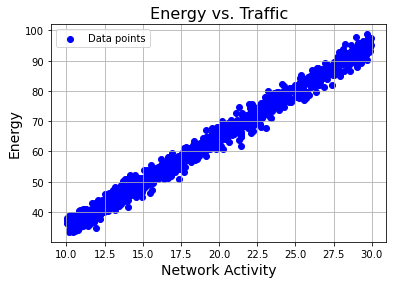

In [370]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

# Mission 1
### 1. **Implementation**:
*See linear_regression.py*

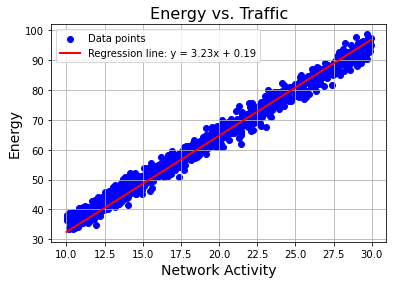

In [371]:
lr = LinearRegression(learning_rate=0.0001, epochs=500)

X = data[['Net_Activity']]
y = data['Energy']

# Assumption: Since discussion task b) require you to analyze prediction error distribution, I assume you have to split the data even though it isn't explicitly mentioned, unlike Mission 2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

x_line = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_line = np.linspace(y_pred.min(), y_pred.max()).reshape(-1, 1)

plt.figure(figsize=(6, 4))
plt.scatter(X, y, c='blue', label='Data points')
plt.plot(x_line, y_line, c='red', linewidth=2,
         label=f"Regression line: y = {float(lr.weights[0]):.2f}x + {float(lr.bias):.2f}"
)
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

### 2. **Discussion**

**a)**

The fitted curve can be visualized in the plot from the code above this cell.
The energy consumption formula from the linear regression model is:

$$
y = 3.23x + 0.19
$$

Taking the derivative of $y$ with respect to $x$:

$$
\frac{dy}{dx} = 3.23
$$

This gives us the slope of the curve, which in this context can be interpreted as:
For every unit increase in Network Activity, SkyNet consumes 3.23 units of Energy.

0.18308015993455523


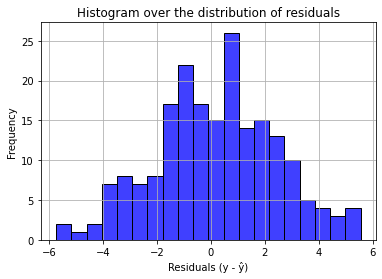

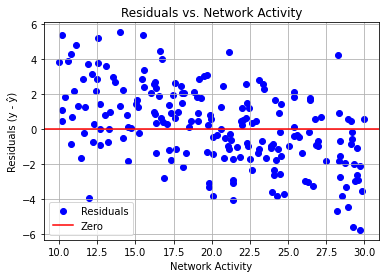

In [372]:
residuals = y_test-y_pred
print(np.mean(residuals))

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=20, color="blue")
plt.title("Histogram over the distribution of residuals")
plt.xlabel("Residuals (y - ŷ)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X_test, residuals, color="blue", label="Residuals")
plt.axhline(y=0, color="red", label="Zero")
plt.xlabel("Network Activity")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residuals vs. Network Activity")
plt.grid(True)
plt.legend()
plt.show()

**b)**



## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [373]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

# Split the train and test with features and target
train = train.copy().drop(columns=['split'])
test = test.copy().drop(columns=['split'])

X_train = train[['x0', 'x1']]
y_train = train['y']

X_test = test[['x0', 'x1']]
y_test = test['y']

# Mission 2
### 1. Implementation
*See logistic_regression.py*

### 2. Performance (*Feature engineering*)

Result with logistic regression without feature engineering:

C:\Users\jensc\Documents\TDT4192-Assignments\Assignment1\logistic_regression.py:48: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  lin_model = np.matmul(self.weights, x.transpose()) + self.bias


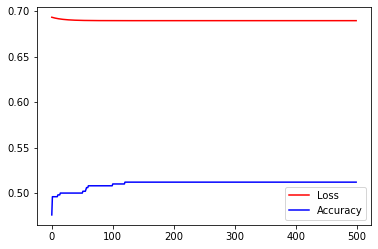

Accuracy: 0.49


In [374]:
lgr = LogisticRegression(learning_rate=0.1, epochs=500)
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

# Plot the loss-accuracy plot
plt.plot([i for i in range(lgr.epochs)], lgr.losses, c='red', label="Loss")
plt.plot([i for i in range(lgr.epochs)], lgr.train_accuracies, c='blue', label="Accuracy")
plt.legend()
plt.show()

print(f"Accuracy: {lgr.accuracy(y_test, y_pred)}") # Result is not good engough

Since the result above is not at least 0.88 in accuracy, we can continue to engineer new features to the dataset.

C:\Users\jensc\Documents\TDT4192-Assignments\Assignment1\logistic_regression.py:48: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  lin_model = np.matmul(self.weights, x.transpose()) + self.bias


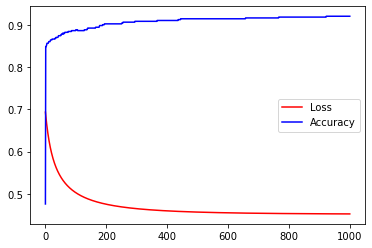

Accuracy: 0.914


In [389]:
def fe_prod(dataframe):
    """
    Inserts product value of x0, x1 in new feature column

    :param dataframe: a dataframe with the format of mission2.csv
    :return: a dataframe with new feature
    """
    df_temp = dataframe.copy()
    df_temp['prod'] = df_temp['x0'] * df_temp['x1']
    return df_temp

# Reload the data
df = fe_prod(data)
train = df[df['split'] == 'train']
test = df[df['split'] == 'test']

train = train.copy().drop(columns=['split'])
test = test.copy().drop(columns=['split'])

X_train = train[['prod']]
y_train = train['y']

X_test = test[['prod']]
y_test = test['y']

# Reset the logistic regression object.
lgr.reset(learning_rate=0.1, epochs=1000)
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

# Re-plot the loss-accuracy plot
plt.plot([i for i in range(lgr.epochs)], lgr.losses, c='red', label="Loss")
plt.plot([i for i in range(lgr.epochs)], lgr.train_accuracies, c='blue', label="Accuracy")
plt.legend()
plt.show()

print(f"Accuracy: {lgr.accuracy(y_test, y_pred)}")

The new accuracy is 0.914 and thus satisfies the condition of at least 0.88 in accuracy.

### 3. Discussions

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [ ]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [ ]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [ ]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)